<a href="https://colab.research.google.com/github/EveTLynn/Packt-Data-Analysis-Workshop/blob/main/C3_Analyzing_Bank_Marketing_Campaign_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Direct marketing campaigns are a classical approach to increasing business revenue, informing potential customers about new products, and merchandising them. Having targeted marketing campaigns can significantly increase success rates and revenue since the audience is based on precise criteria and the analysis of past marketing campaigns. Thus, extracting information about successful campaigns and customers can significantly reduce marketing costs and increase sales.

we will analyze data from the direct marketing campaign of a Portuguese banking institution based on phone calls that were performed between May 2008 and November 2010.

The scope of the marketing campaign is selling long-term deposits. For each call, information about the client and the outcome of the call is registered. For instance, client information contains family and education status and the client's current financial situation (the data is anonymized). Information about the last call from the previous marketing campaign is also registered. In this way, we have a clear picture of the type of client that has been contacted, as well as information about the historical outcome from previous marketing campaigns.

Here's the details on the features:

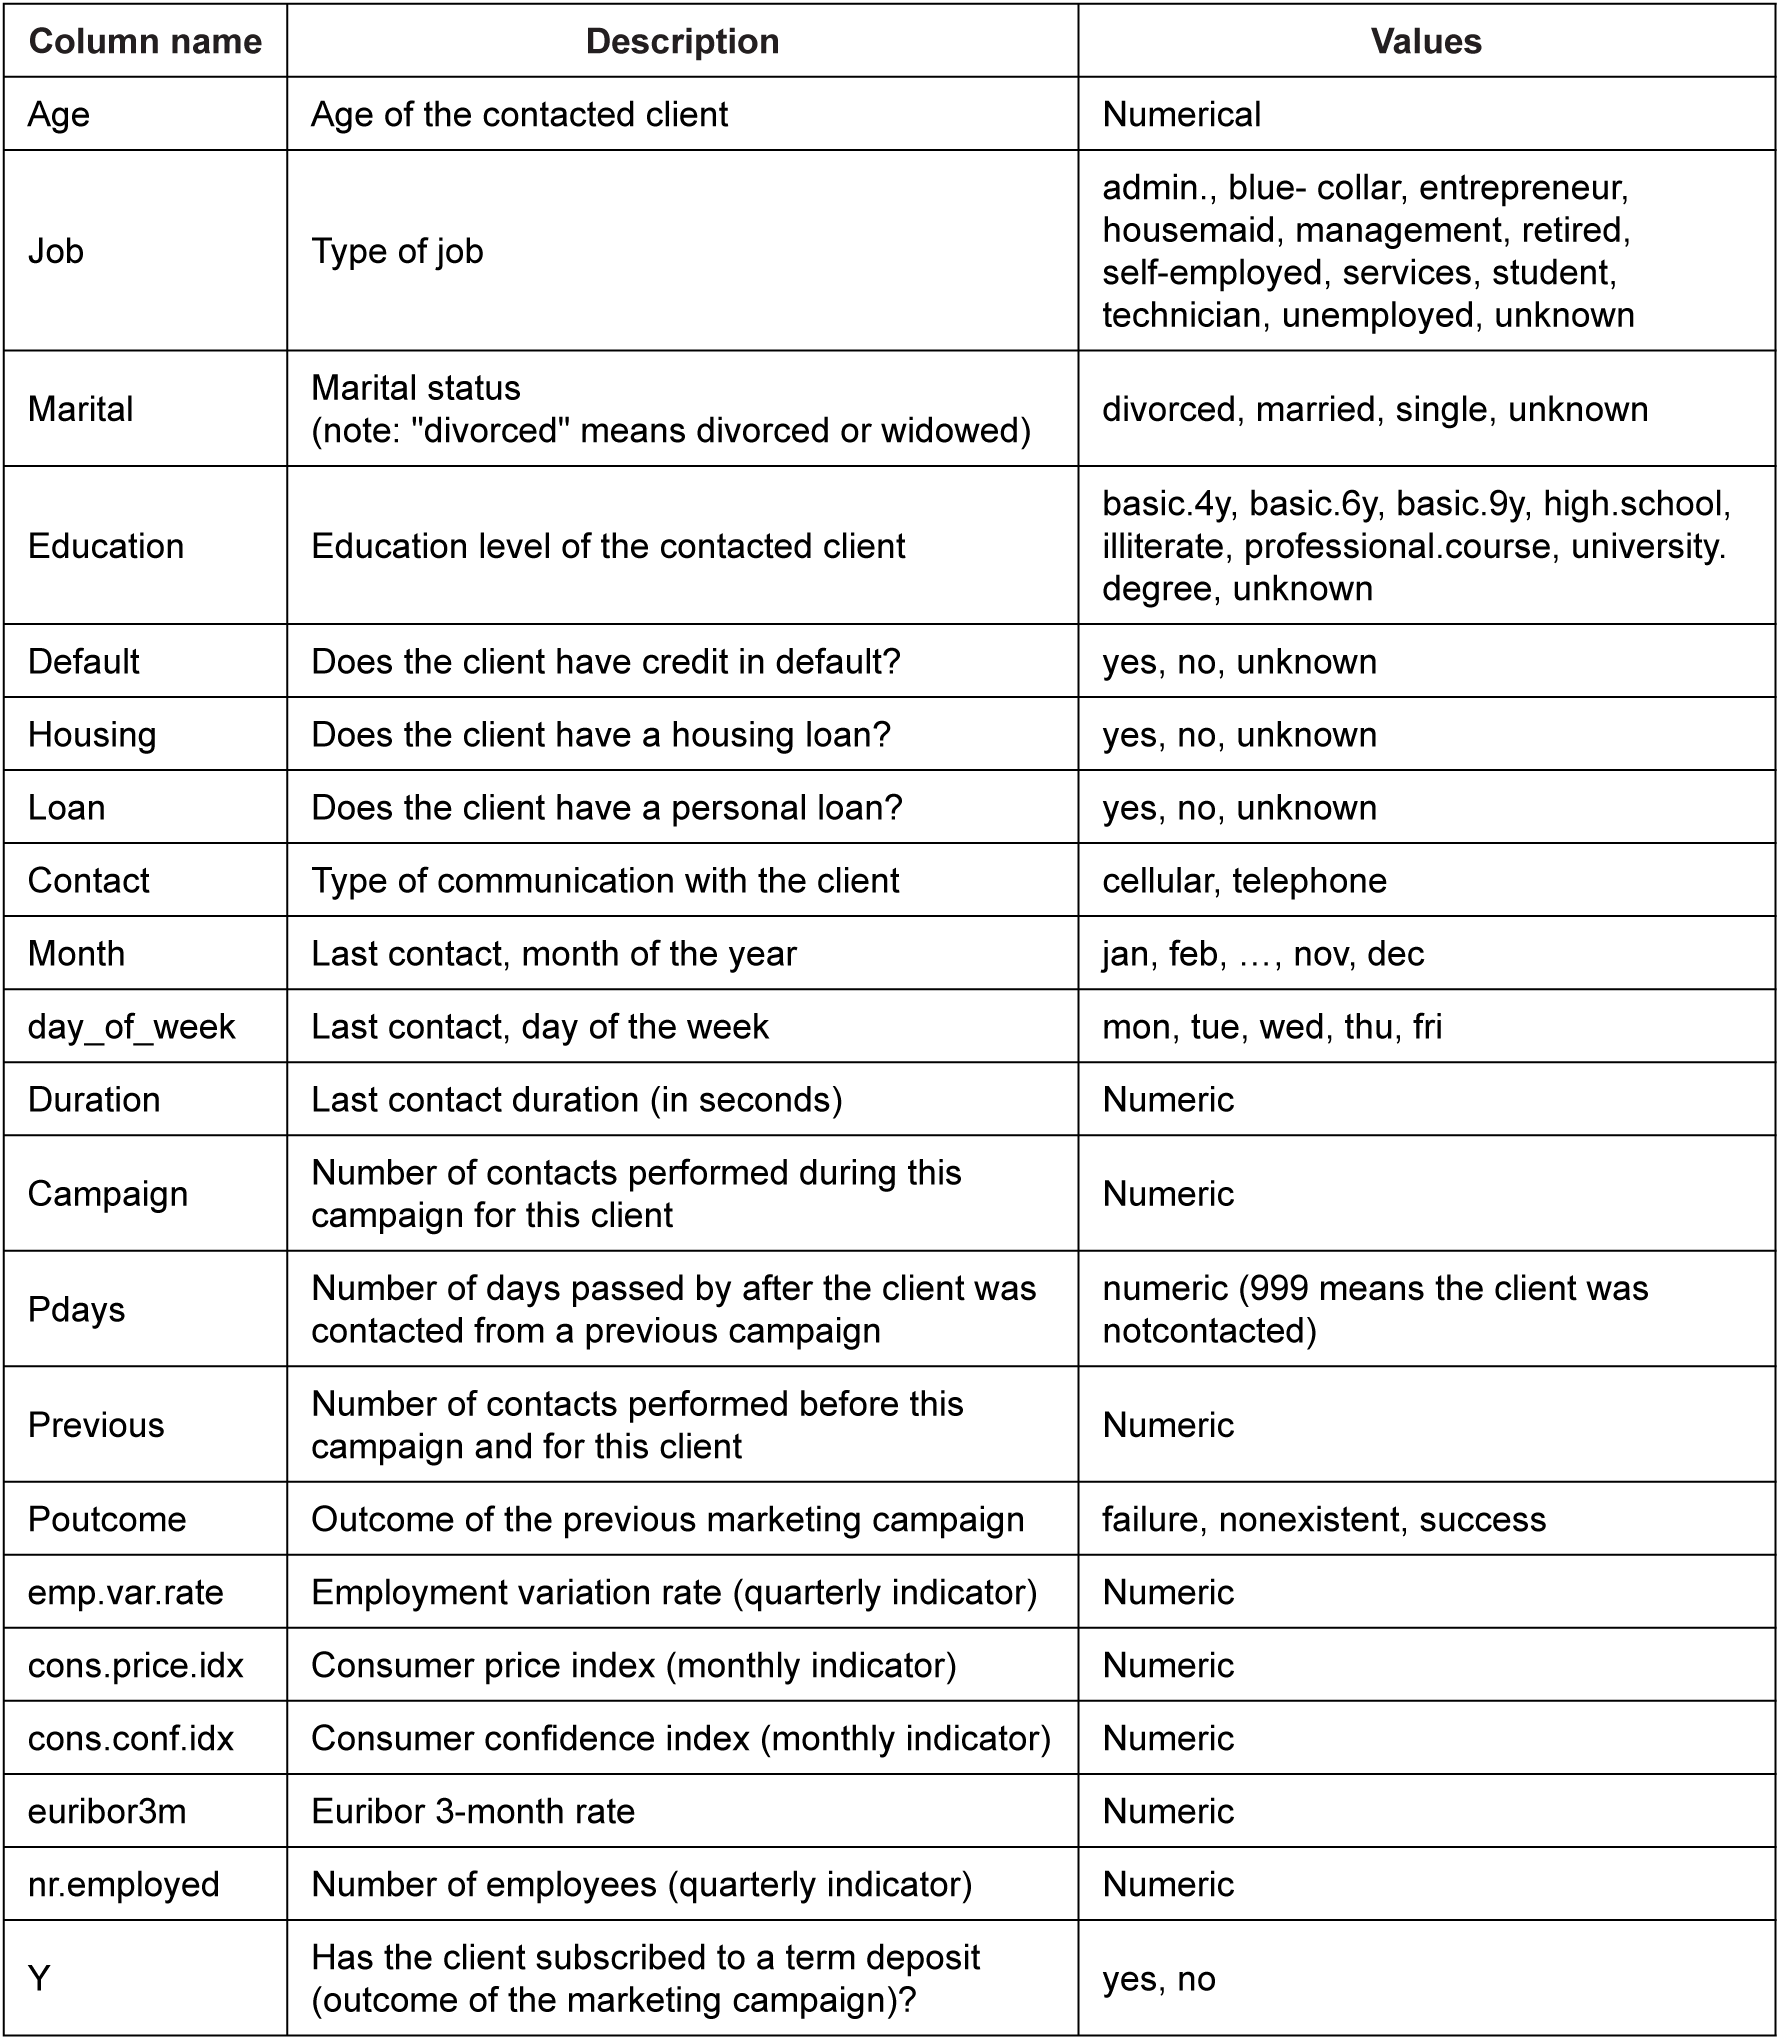

# Initial Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
## Print all collumns of a dataframe
pd.set_option('display.max_columns', None)

# pull data from github
bank_data = pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter03/data/bank-additional/bank-additional-full.csv", sep=";")

# visualize the head of the dataset
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Analyzing Distributions of Numerical Features

In [3]:
numerical_features = bank_data.select_dtypes(include='number')
numerical_features.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [4]:
# desciptive statistics
numerical_features.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


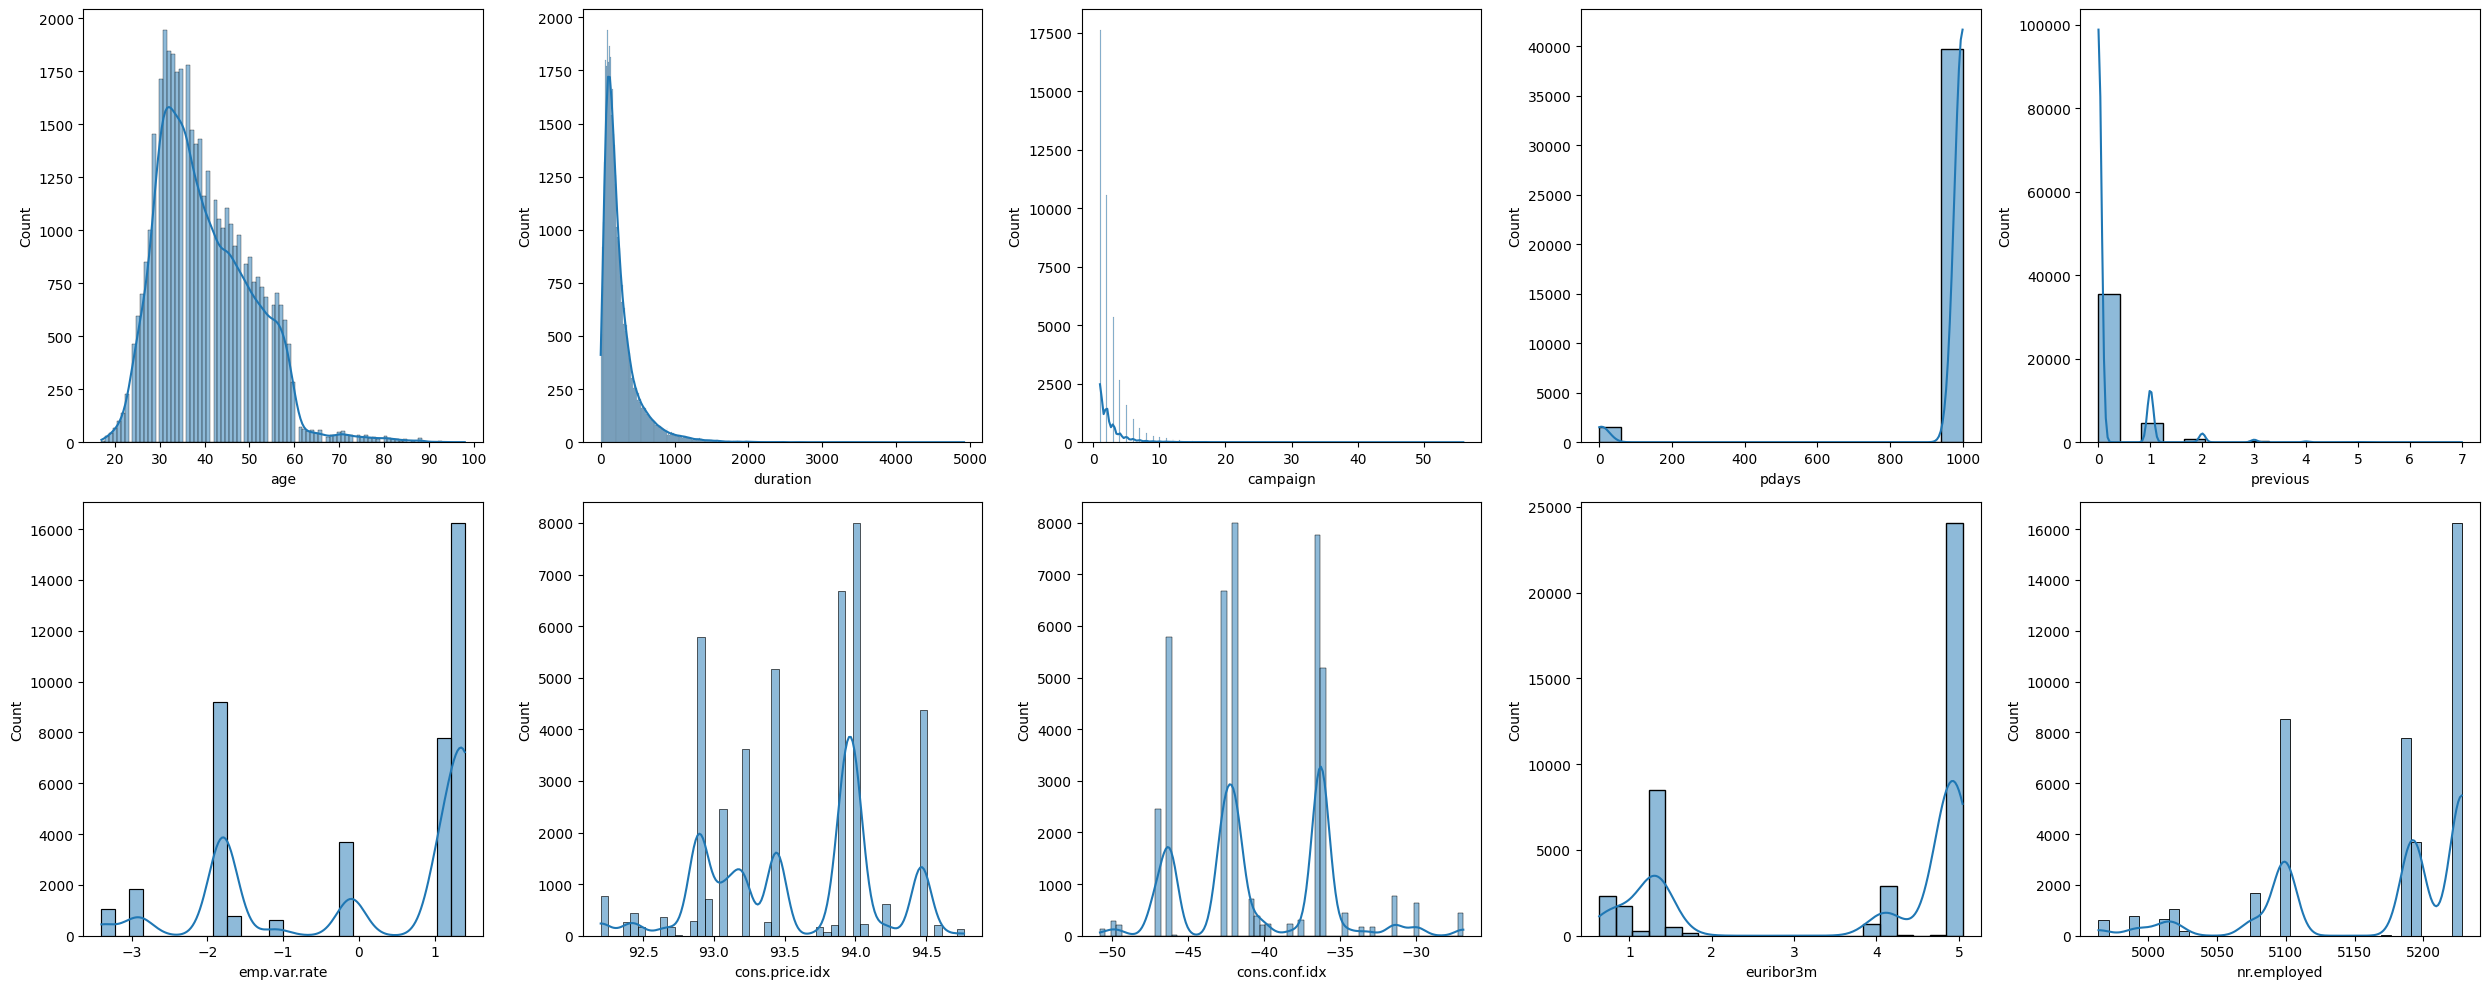

In [5]:
# plot distributions of numerical features
plt.figure(figsize=(25,10))
for index, col in enumerate(numerical_features):
    plt.subplot(2, 5, index + 1)
    sns.histplot(numerical_features.iloc[:, index], kde="True")

plt.tight_layout()
plt.show()

We can see that besides the age and duration columns, the rest of the numerical features do not seem to have a regular distribution of values since their distributions seem scattered and only a few values are present.

## Analyzing Distributions of Categorical Features

In [6]:
categorical_features = bank_data.select_dtypes(include='object')
categorical_features.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [7]:
categorical_features.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


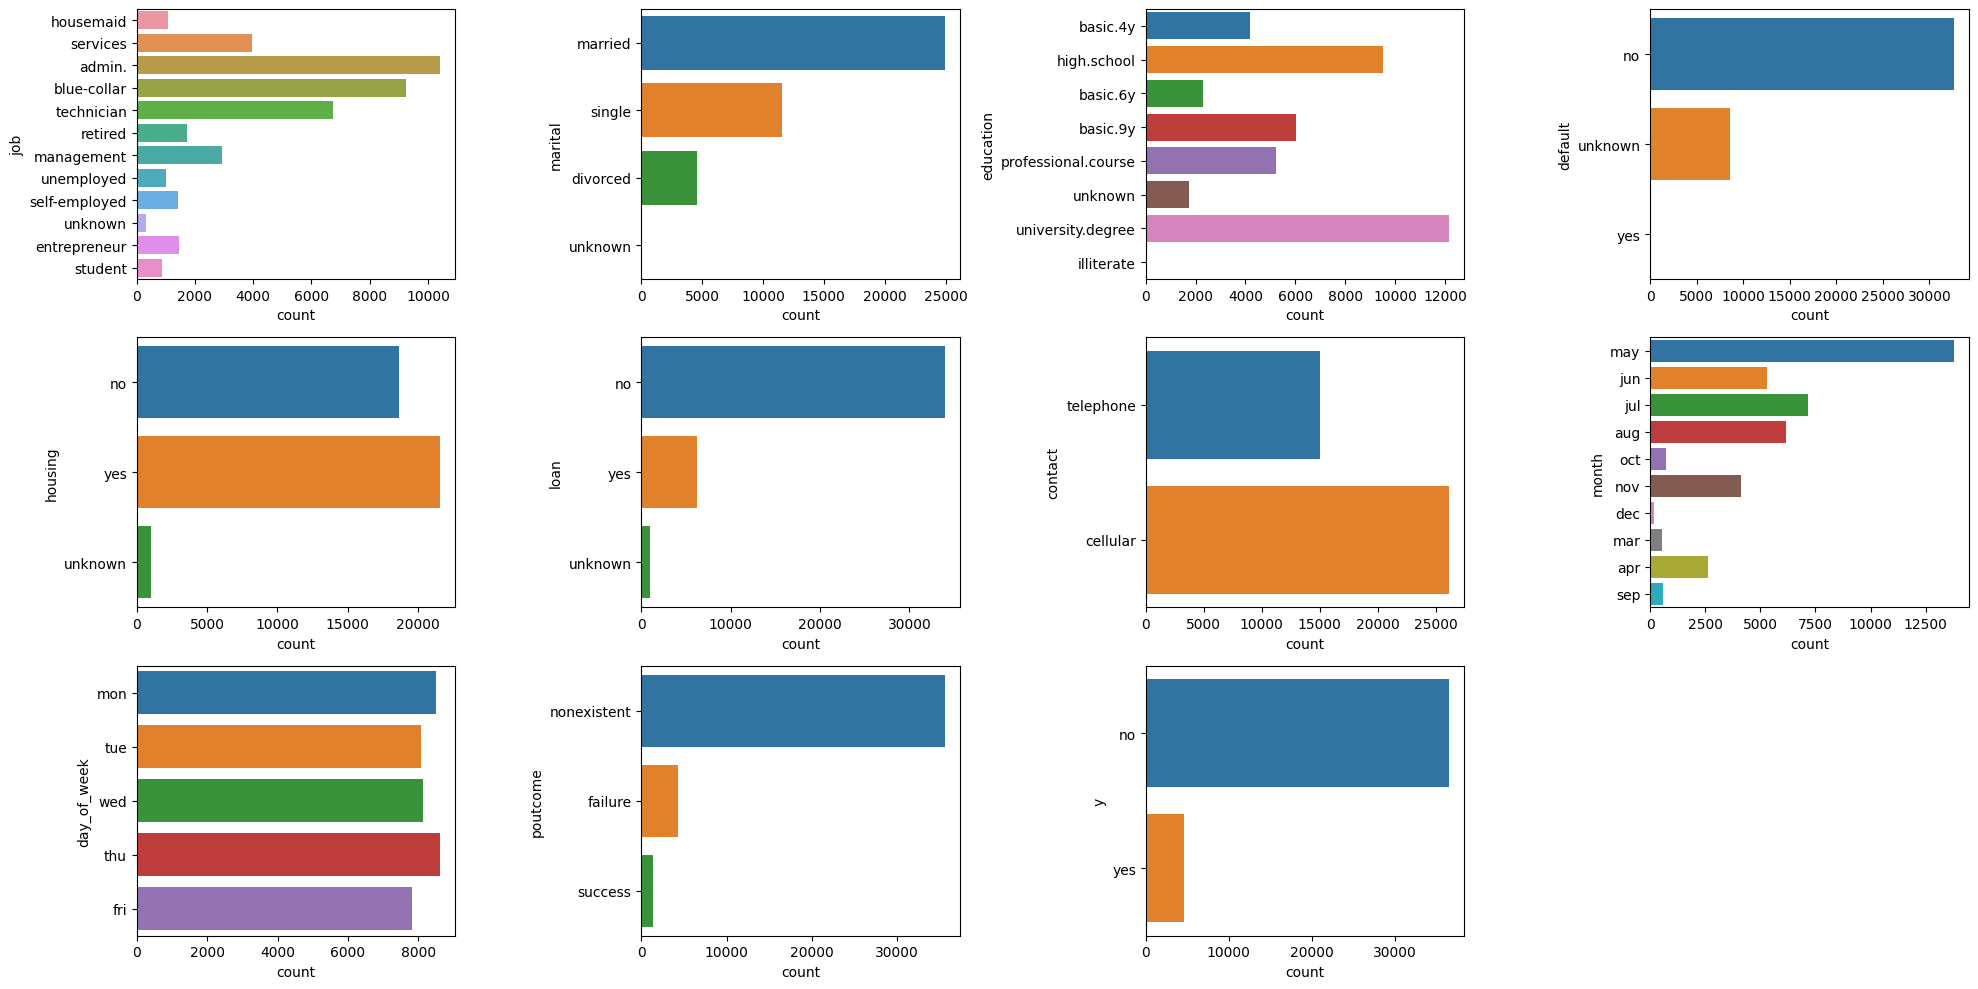

In [8]:
# plot distributions of numerical features
cate_list = categorical_features.columns.to_list()
plt.figure(figsize=(20,10))
for index, col in enumerate(cate_list):
    plt.subplot(3, 4, index + 1)
    sns.countplot(data=categorical_features, y=cate_list[index])

plt.tight_layout()
plt.show()

In [9]:
# compute number of entries in y column
print("Total number of entries:")
print(bank_data["y"].value_counts(ascending=True))
print()
print("Percentages:")
print(bank_data["y"].value_counts(normalize=True, ascending=True)*100)

Total number of entries:
yes     4640
no     36548
Name: y, dtype: int64

Percentages:
yes    11.265417
no     88.734583
Name: y, dtype: float64


From the preceding output, we can derive that only 11% of the contacted customers decided to accept the offer from the bank.

# Impact of Numerical Features on the Outcome

We will start our analysis by addressing the following question: Is there a statistically significant difference in numerical features for successful and non-successful marketing campaigns? For this reason, we will create violin plots that compare the distribution of the numerical features for the two types of outcomes ("yes" for a successful marketing campaign, "no" for an unsuccessful one)

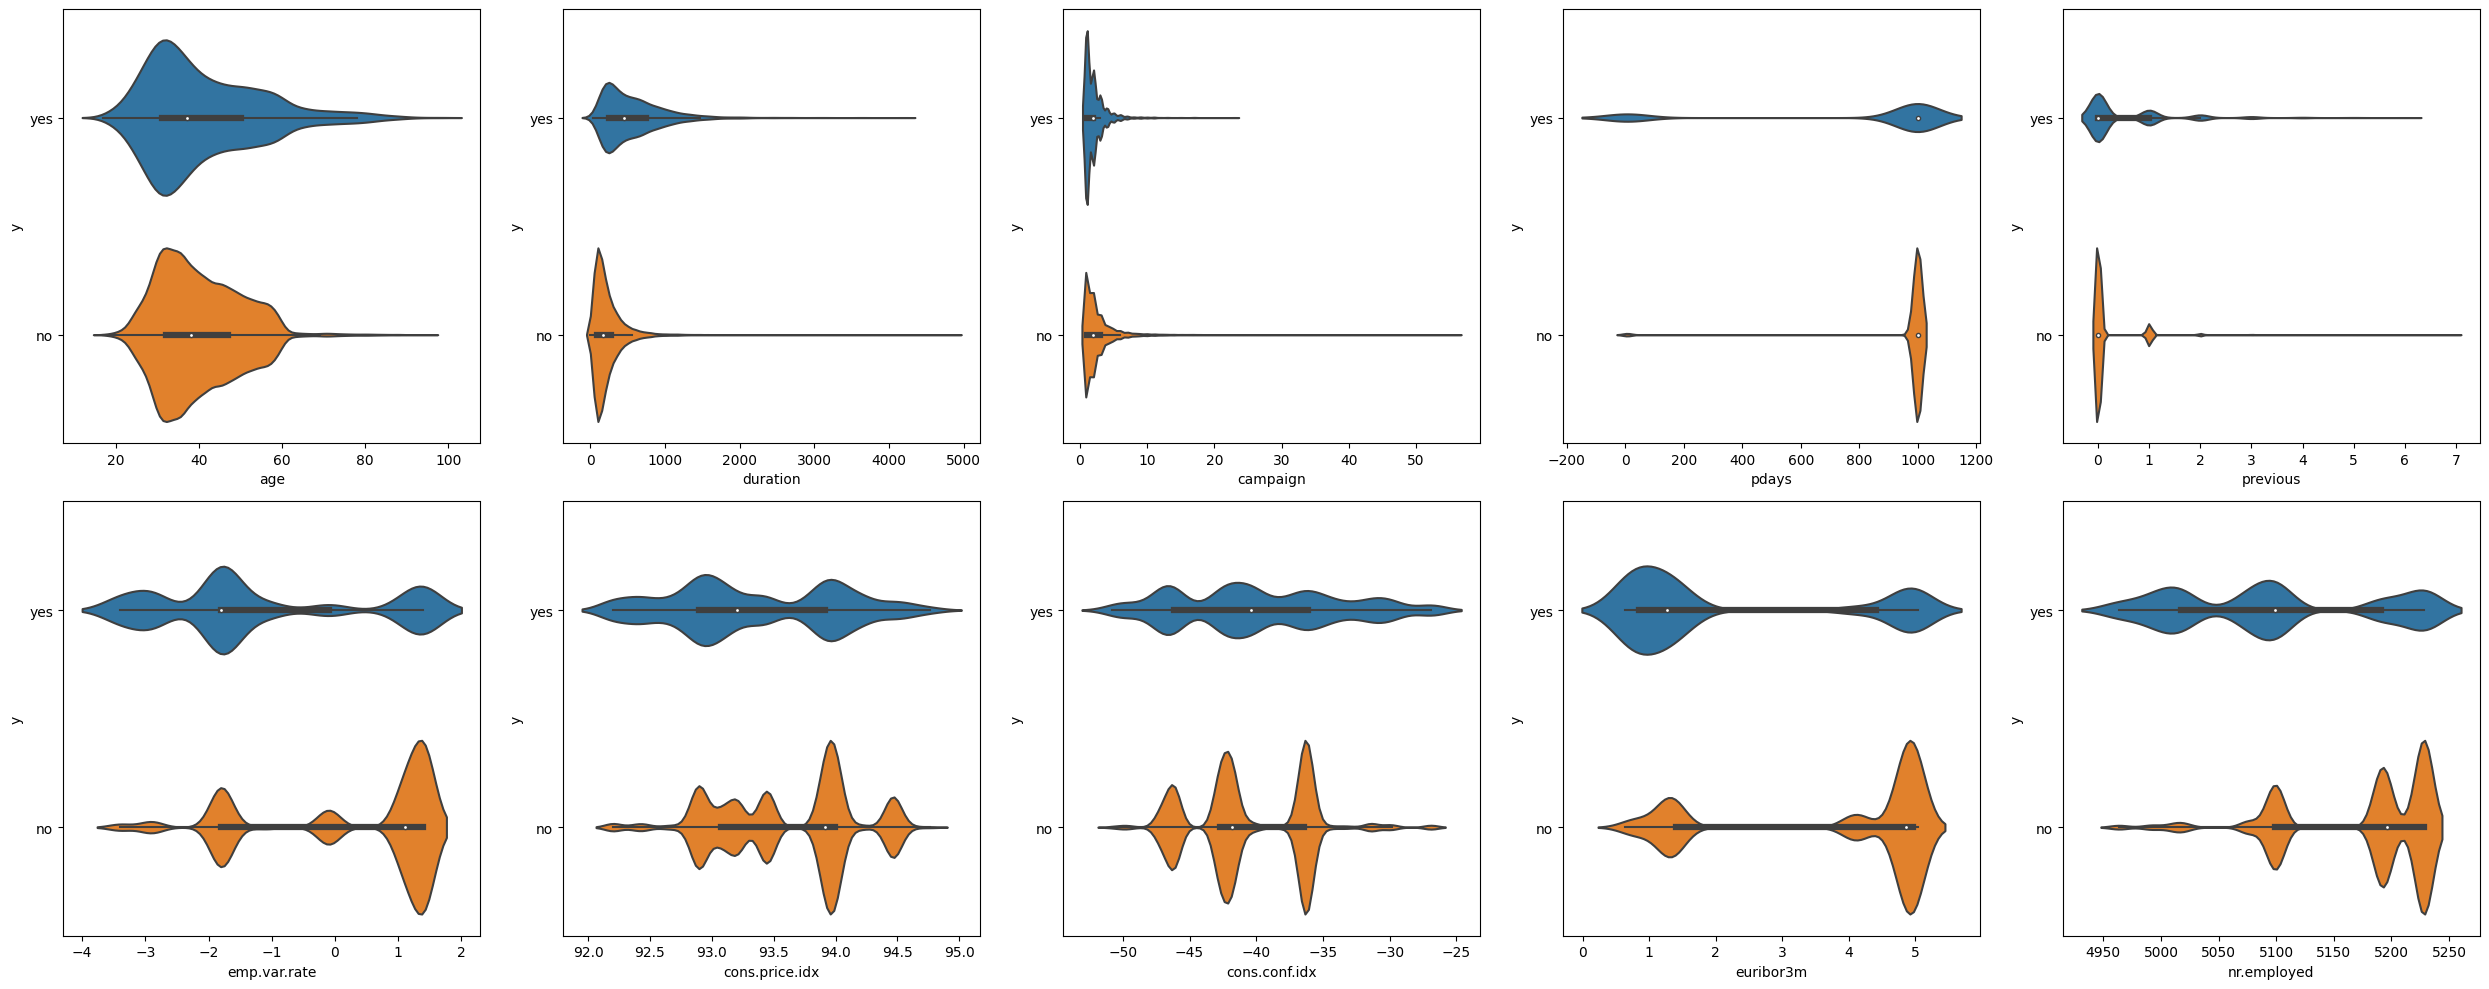

In [10]:
#num_list = numerical_features.columns.to_list()
plt.figure(figsize=(25,10))
for index, col in enumerate(numerical_features):
    plt.subplot(2, 5, index + 1)
    sns.violinplot(data=bank_data, x=col, y='y', order=["yes", "no"])

plt.tight_layout()
plt.show()

The preceding figure shows that the distributions of most of the numerical features vary between successful marketing campaigns (those whose y column value is equal to "yes") and unsuccessful ones (those whose y column value is equal to "no"). We can assess this difference from a statistical perspective by running a hypothesis test on each of the numerical features, in which we will test whether the average value of the respective numerical feature is different for "yes" entries for the y column against "no" entries for each numerical feature.

In [11]:
from scipy.stats import ttest_ind

# define function for computing mean of column for yes and no cases,
# as well as the test statistics and pvalue for equality of means test
def test_means(data, col):
    yes_mask = data["y"] == "yes"
    values_yes = data[col][yes_mask]
    values_no = data[col][~yes_mask]
    mean_yes = values_yes.mean()
    mean_no = values_no.mean()

    ttest_res = ttest_ind(values_yes, values_no)

    return [col, mean_yes, mean_no, round(ttest_res[0], 4), round(ttest_res[1],10)]


# define pandas dataframe, in which values should be filled
test_df = pd.DataFrame(columns=["column", "mean yes", "mean no", "ttest stat", "ttest pval"])

# for each column in the numerical_features, compute means
# and test statistics and fill the values in the dataframe
for index, col in enumerate(numerical_features):
    test_df.loc[index] = test_means(bank_data, col)

test_df

,column,mean yes,mean no,ttest stat,ttest pval
0,age,40.913147,39.911185,6.1721,7.000000e-10
1,duration,553.191164,220.844807,89.9672,0.000000e+00
2,campaign,2.051724,2.633085,-13.4965,0.000000e+00
3,pdays,792.035560,984.113878,-69.7221,0.000000e+00
4,previous,0.492672,0.132374,48.0027,0.000000e+00
5,emp.var.rate,-1.233448,0.248875,-63.4337,0.000000e+00
6,cons.price.idx,93.354386,93.603757,-27.9032,0.000000e+00
7,cons.conf.idx,-39.789784,-40.593097,11.1539,0.000000e+00
8,euribor3m,2.123135,3.811491,-65.6466,0.000000e+00
9,nr.employed,5095.115991,5176.166600,-76.9845,0.000000e+00


For each of the numerical features, the average value for successful marketing campaigns is significantly different than the average value for unsuccessful marketing campaigns since all the p-values < 0.05.

## Hypothesis Test of the Difference of Distributions in Numerical Features
Perform a Kolmogorov-Smirnov test for the equality of distributions for each of the numerical features for successful versus unsuccessful marketing campaigns.

In [12]:
from scipy.stats import ks_2samp

# define function which performs Kolmogorov-Smirnov test,
# for provided column
def test_ks(data, col):
    yes_mask = data["y"] == "yes"
    values_yes = data[col][yes_mask]
    values_no = data[col][~yes_mask]

    kstest_res = ks_2samp(values_yes, values_no)

    return [col, round(kstest_res[0], 4), round(kstest_res[1],4)]

# define pandas dataframe, in which values should be filled
test_df = pd.DataFrame(columns=["column", "ks stat", "ks pval"])

# for each column in the numerical_features,
# compute test statistics and fill the values in the dataframe
for index, col in enumerate(numerical_features):
    test_df.loc[index] = test_ks(bank_data, col)

test_df

,column,ks stat,ks pval
0,age,0.0861,0.0
1,duration,0.4641,0.0
2,campaign,0.0808,0.0
3,pdays,0.1934,0.0
4,previous,0.2102,0.0
5,emp.var.rate,0.4324,0.0
6,cons.price.idx,0.2281,0.0
7,cons.conf.idx,0.1998,0.0
8,euribor3m,0.4326,0.0
9,nr.employed,0.4324,0.0


<Figure size 1000x1000 with 0 Axes>

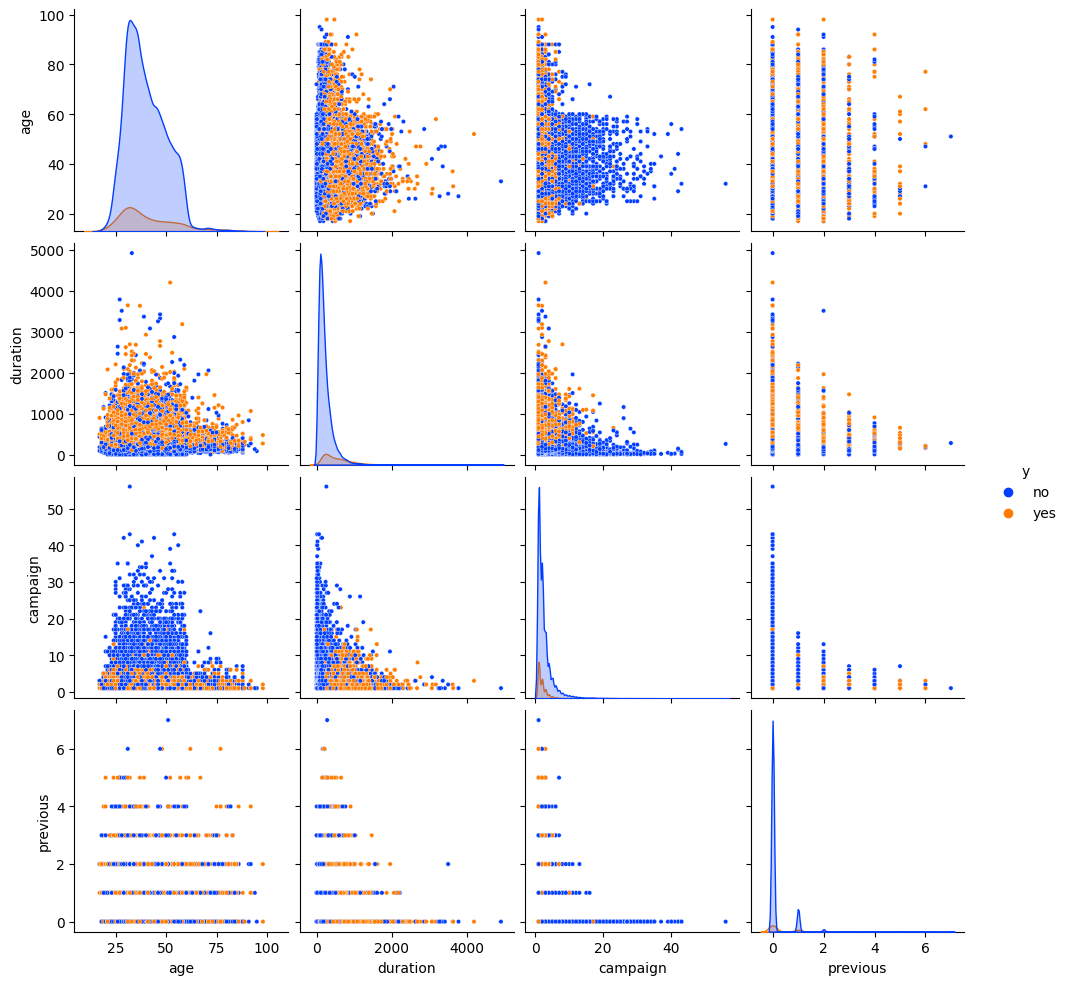

In [13]:
# create arrays containing cambaing and financial columns
campaign_columns = ["age", "duration", "campaign", "previous"]
financial_columns = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]

# create pairplot between campaign columns
plot_data = bank_data[campaign_columns + ["y"]]
plt.figure(figsize=(10,10))
sns.pairplot(plot_data, hue="y", palette="bright", plot_kws={"s": 10})

From the preceding figure, we can immediately see that, in the previous column,
most of the successful marketing campaigns were with newly contacted customers,
while a substantial peak is present for customers who were contacted the second
time, but without success.

<Figure size 1000x1000 with 0 Axes>

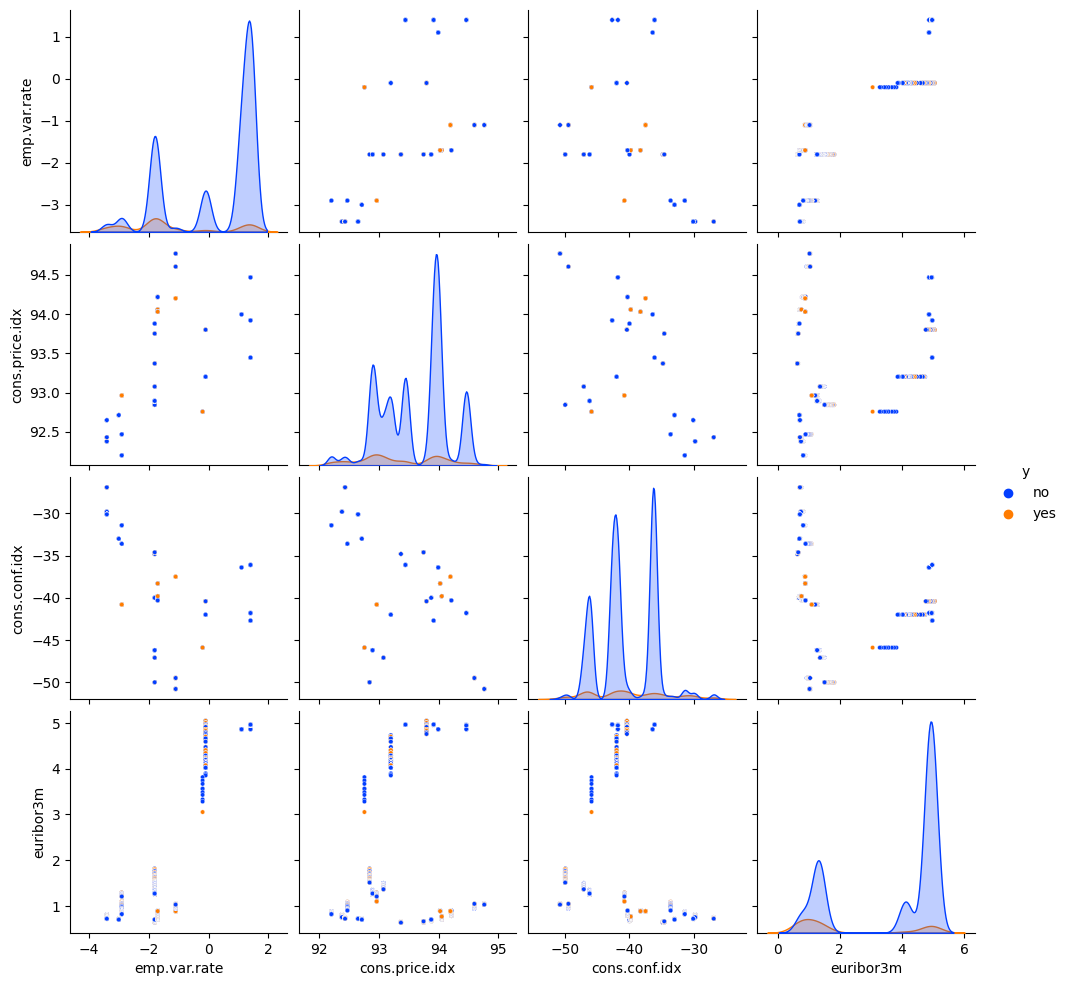

In [14]:
# create pairplot between financial features
plot_data = bank_data[financial_columns + ["y"]]
plt.figure(figsize=(10,10))
sns.pairplot(plot_data, hue="y", palette="bright", plot_kws={"s": 10})

Analyze the correlations between the different numerical features. This is important so that we have a clear picture of how the different features behave with respect to each other. We will do this by distinguishing between the two cases, that is, successful and unsuccessful customer calls

In [15]:
# create mask for successful calls
successful_calls = bank_data.y == "yes"

# plot correlation matrix for successful calls
plot_data = bank_data[campaign_columns + financial_columns][successful_calls]
successful_corr = plot_data.corr()
successful_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-15-b327eb5ec3f0>:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  successful_corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1.00,-0.06,-0.01,0.07,-0.08,-0.02,0.14,-0.09
duration,-0.06,1.00,0.16,-0.23,0.50,0.24,-0.14,0.50
campaign,-0.01,0.16,1.00,-0.10,0.22,0.12,-0.04,0.21
previous,0.07,-0.23,-0.10,1.00,-0.28,0.09,0.13,-0.39
emp.var.rate,-0.08,0.50,0.22,-0.28,1.00,0.66,-0.27,0.93
cons.price.idx,-0.02,0.24,0.12,0.09,0.66,1.00,-0.33,0.41
cons.conf.idx,0.14,-0.14,-0.04,0.13,-0.27,-0.33,1.00,-0.12
euribor3m,-0.09,0.50,0.21,-0.39,0.93,0.41,-0.12,1.00


In [16]:
# plot correlation matrix for unsuccessful calls
plot_data = bank_data[campaign_columns + financial_columns][~successful_calls]
unsuccessful_corr = plot_data.corr()
unsuccessful_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-16-9c1ee45ab329>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  unsuccessful_corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1.00,0.00,0.01,-0.00,0.03,0.01,0.12,0.04
duration,0.00,1.00,-0.08,-0.00,0.00,0.02,0.00,0.01
campaign,0.01,-0.08,1.00,-0.07,0.13,0.12,-0.01,0.12
previous,-0.00,-0.00,-0.07,1.00,-0.42,-0.27,-0.14,-0.44
emp.var.rate,0.03,0.00,0.13,-0.42,1.00,0.80,0.32,0.98
cons.price.idx,0.01,0.02,0.12,-0.27,0.80,1.00,0.15,0.73
cons.conf.idx,0.12,0.00,-0.01,-0.14,0.32,0.15,1.00,0.39
euribor3m,0.04,0.01,0.12,-0.44,0.98,0.73,0.39,1.00


As we can observe from the preceding two figures, the correlation between
`euribor3m` and `emp.var.rate` is very high (approximately 0.93 for successful and 0.98 for unsuccessful calls). That is quite an interesting phenomenon as the first one relates to the average interest rate at which European banks lend money to other banks with a maturity of 3 months, while the second one relates to the employment variation, that is, the rate at which people are hired or fired in an economy.

A high positive correlation of the `cons.price.idx` column with the `emp.var.rate` and `euribor3m` columns is a clear indicator of an expanding economy, in which growing employment means more people with money—hence more spending and higher inflation. In such situations, central banks tend to increase interest rates (in order to keep inflation under control), which is totally in line with our observation of increasing the `euribor3m` column.

The CPI is a measure that observes the change of prices of a basket of consumers' goods and services (food, transportation, households, and medical care). The basket itself is a collection of goods and services from eight major areas: medical care, food and beverages, housing, apparel, transportation, education, recreation, and other goods
and services. The formula for the CPI is as follows:

$$CPI=\frac{\text{Cost of Market Basket in Given Year}}{\text{Cost of Market Basket in Base Year}}\times100$$

In [17]:
# plot difference of successful - unsuccessful correlation matrices
diff_corr = successful_corr - unsuccessful_corr
diff_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-17-873afcdc3511>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  diff_corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,0.00,-0.06,-0.02,0.08,-0.11,-0.04,0.02,-0.13
duration,-0.06,0.00,0.24,-0.23,0.50,0.22,-0.15,0.49
campaign,-0.02,0.24,0.00,-0.04,0.09,-0.01,-0.04,0.10
previous,0.08,-0.23,-0.04,0.00,0.14,0.36,0.27,0.05
emp.var.rate,-0.11,0.50,0.09,0.14,0.00,-0.14,-0.59,-0.05
cons.price.idx,-0.04,0.22,-0.01,0.36,-0.14,0.00,-0.48,-0.32
cons.conf.idx,0.02,-0.15,-0.04,0.27,-0.59,-0.48,0.00,-0.51
euribor3m,-0.13,0.49,0.10,0.05,-0.05,-0.32,-0.51,0.00


We can see that there is a significant difference in the correlations between the `duration` and `emp.var.rate` columns for successful (correlation: 0.5) and unsuccessful (correlation: 0.0035) calls.

This might look like a significant indicator at first, but note that the duration column represents the duration of the call. Therefore, we can expect successful calls to have a longer duration (as information about the product has to be presented and the customer's data has to be gathered). On the other hand, the `emp.var.rate` column represents the employment variation rate, a macroeconomic factor that is definitely not influenced by the length of certain phone calls. It is always important to remember that correlation does not imply causation. Another interesting relationship is the one between the `cons.conf.idx` column and the `emp.var.rate`, `cons.price.idx`, and `euribor3m` columns.

The `cons.conf.idx` column represents the Consumer Confidence Index, an
economic indicator that defines the degree of optimism in an economy. The correlations between the `cons.conf.idx` and `emp.var.rate` columns and the `cons.price.idx` and `euribor3m` columns for successful and unsuccessful calls are given in the following table.

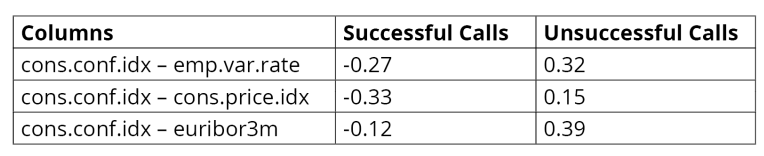

From the preceding table, an interesting fact arises: the consumer confidence index is negatively correlated with the three mentioned columns for successful customer calls, and positively correlated for unsuccessful ones. This means that when the overall economic sentiment is pessimistic, people are willing to accept the new banking products and vice versa.

# Modeling the Relationship via Logistic Regression

## Linear Regression

In this section, we will be applying linear regression in order to predict the consumer confidence index (the cons.conf.idx column) based on the employment variation rate, the CPI, and the euribor 3-month interest rate (the `emp.var.rate`, `cons.price.idx`, and `euribor3m `columns, respectively). In Python, we can easily fit a linear regression model by using the OLS() function from the statsmodels.api package.

In [18]:
import statsmodels.api as sm

# create feature matrix and target variable
X = bank_data[["emp.var.rate", "cons.price.idx", "euribor3m"]]
X = sm.add_constant(X) # add constant value for the intercept term
y = bank_data["cons.conf.idx"]

# define and fit model
lineare_regression_model = sm.OLS(y, X)
result = lineare_regression_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          cons.conf.idx   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     2960.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        06:49:35   Log-Likelihood:            -1.1753e+05
No. Observations:               41188   AIC:                         2.351e+05
Df Residuals:                   41184   BIC:                         2.351e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -82.4025      5.999    -13.

Our R-squared is low (0.177) which means our model isn't predicting accurately. From the coef, it's seemed like cons.price.idx has the least impact on the cpi out of the 3 features. All the P>|t| is less than 0.05 means that all the coefficients are statistically significant.

## Logistic Regression

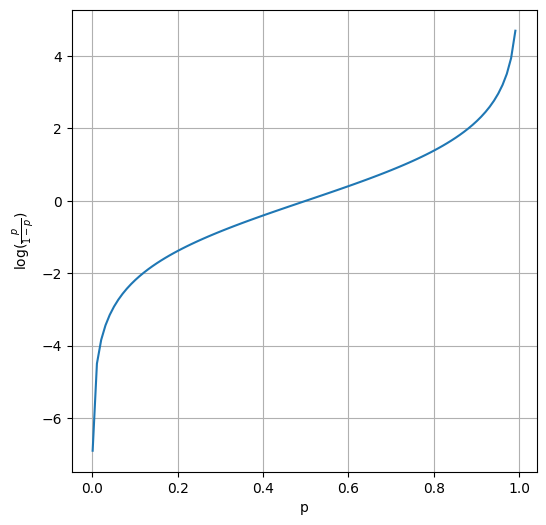

In [22]:
# plot logit function
x = np.arange(0.001, 1, 0.01)
logit = np.log(x/(1-x))

plt.figure(figsize=(6,6))
plt.plot(x,logit)
plt.xlabel("p")
plt.ylabel("$\log(\\frac{p}{1-p})$")
plt.grid()

Create a logistic regression model that has the age, duration, campaign, and previous columns as feature vectors and the y column as the target variable

In [23]:
# create feature matrix and target variable
X = bank_data[["age", "duration", "campaign", "previous"]]
X = sm.add_constant(X) # add constant value for the intercept term
y = np.where(bank_data["y"] == "yes", 1, 0) # target has to be numeric

# define and fit model
logistic_regression_model = sm.Logit(y, X)
result = logistic_regression_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.269969
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41183
Method:                           MLE   Df Model:                            4
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:                  0.2331
Time:                        07:17:28   Log-Likelihood:                -11119.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7793      0.076    -49.435      0.000      -3.929      -3.629
age            0.0091      0.

As in the case of linear regression, the model returns the parameters from the logistic regression equation. Hence, we can easily construct the estimation of the probabilities of the y variable being equal to "yes" or "no" as follows:

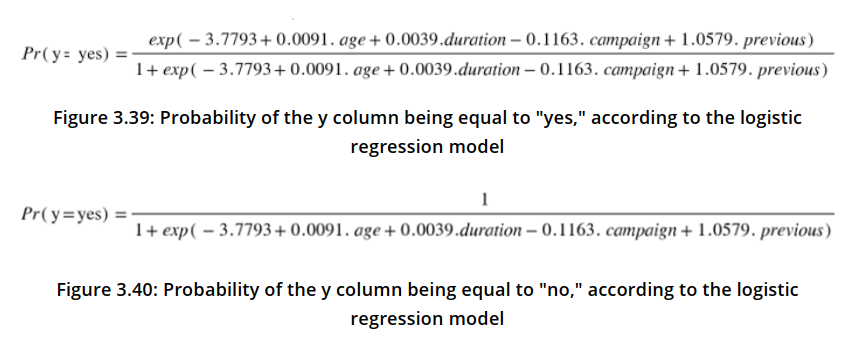

In [24]:
# example of one hot encoding
print(bank_data["education"].unique())

hot_encoded = pd.get_dummies(bank_data["education"])
hot_encoded["education"] = bank_data["education"]
hot_encoded.head(10)

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown,education
0,1,0,0,0,0,0,0,0,basic.4y
1,0,0,0,1,0,0,0,0,high.school
2,0,0,0,1,0,0,0,0,high.school
3,0,1,0,0,0,0,0,0,basic.6y
4,0,0,0,1,0,0,0,0,high.school
5,0,0,1,0,0,0,0,0,basic.9y
6,0,0,0,0,0,1,0,0,professional.course
7,0,0,0,0,0,0,0,1,unknown
8,0,0,0,0,0,1,0,0,professional.course
9,0,0,0,1,0,0,0,0,high.school


### Logistic Regression on the Full Marketing Campaign Data

In [28]:
# transform all features into numerical ones, by using
# the get_dummies() function
X = bank_data.drop("y", axis=1)
X = pd.get_dummies(X)
X = sm.add_constant(X)
print(X.columns)

Index(['const', 'age', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 

In [29]:
# extract and transform target variable
y = np.where(bank_data["y"] == "yes", 1 ,0)

In [30]:
# define and fit model
full_logistic_regression_model = sm.Logit(y, X)
result = full_logistic_regression_model.fit(maxiter=500)
print(result.summary())

         Current function value: inf
         Iterations: 500


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


LinAlgError: ignored

### Creating a Leaner Logistic Regression Model

In [31]:
# import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [32]:
# pull data from github
bank_data = pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter03/data/bank-additional/bank-additional-full.csv", sep=";")

In [33]:
# create a feature matrix
columns = ["duration", "campaign", "pdays", "cons.price.idx",
           "cons.conf.idx", "euribor3m"]
X = bank_data[columns]
X = sm.add_constant(X)

X.head()

,const,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
0,1.0,261,1,999,93.994,-36.4,4.857
1,1.0,149,1,999,93.994,-36.4,4.857
2,1.0,226,1,999,93.994,-36.4,4.857
3,1.0,151,1,999,93.994,-36.4,4.857
4,1.0,307,1,999,93.994,-36.4,4.857


In [34]:
# transform target variable
y = np.where(bank_data["y"] == "yes", 1, 0)

In [35]:
# define and fit model
logistic_regression_model = sm.Logit(y, X)
result = logistic_regression_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.222140
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41181
Method:                           MLE   Df Model:                            6
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:                  0.3690
Time:                        07:32:37   Log-Likelihood:                -9149.5
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -43.1379      3.524    -12.240      0.000     -50.046     -36.230
duration         

### Logistic Regression with scikit-learn


In [44]:
# Import the model class
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix

In [43]:
# drop highly-correlated feature
data = bank_data.drop("euribor3m", axis=1)

# change y column to number
yes_no_encoding = {"no":0, "yes":1}
data["y"] = data["y"].apply(lambda x: yes_no_encoding[x])

# one-hot-encoding categorical features
data = pd.get_dummies(data)
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [45]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns="y"),
                                                   data.y, random_state=42, test_size=0.2)

# scale train - test set
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [47]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((32950, 62), (32950,), (8238, 62), (8238,))

In [48]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test_scaled, y_test)))
print(classification_report(y_test,y_pred))

Accuracy of logistic regression classifier on test set: 0.91
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.44      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



The dataset is imbalanced with only 11% of "yes" label, so the model does not predict well on "yes" label.

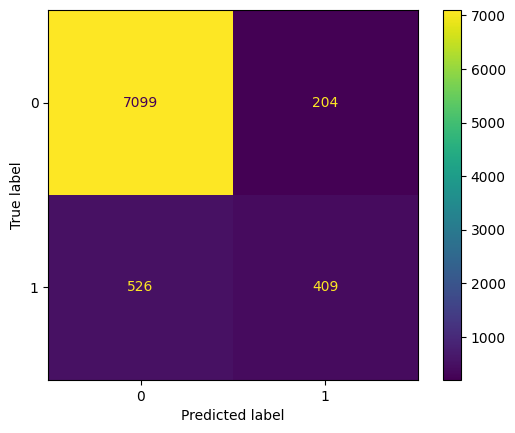

In [49]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()